In [5]:
import pandas as pd
import re
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn import metrics

import tensorflow as tf

In [6]:
from warnings import simplefilter

# ignore all warnings
simplefilter(action='ignore')

In [7]:
trainData = pd.read_csv("TrainingDataBinary.csv", sep=",",header=None)
testData = pd.read_csv("TestingDataBinary.csv", sep=",",header=None)

In [8]:
df_train = pd.DataFrame(data = trainData)
df_test = pd.DataFrame(data = testData)

In [5]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,0,0,0,0,0,0,0,0,0,0
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,0,0,0,0,0,0,0,0,0,0
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,0,0,0,0,0,0,0,0,0,0
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,0,0,0,0,0,0,0,0,0,0
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_train.iloc[:,:-1]

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,0,0,0,0,0,0,0,0,0,0
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,0,0,0,0,0,0,0,0,0,0
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,0,0,0,0,0,0,0,0,0,0
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,0,0,0,0,0,0,0,0,0,0
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,116.889120,131860.3269,-3.076783,131810.1804,-123.094253,131910.4735,114.780635,376.10794,-5.254023,374.82617,...,0,0,0,0,0,0,0,0,0,0
5996,116.849013,131810.1804,-3.116890,131760.0339,-123.128630,131885.4002,114.769176,376.29105,-5.322778,374.82617,...,0,0,0,0,0,0,0,0,0,0
5997,116.384917,131734.9606,-3.586716,131684.8140,-123.586996,131785.1071,114.299351,376.47416,-5.849899,374.82617,...,0,0,0,0,0,0,0,0,0,0
5998,111.125164,130506.3704,-8.846468,130456.2238,-128.858208,130556.5169,106.667553,478.83265,-13.464508,477.73399,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_train.iloc[:,-1]

0       0
1       0
2       0
3       0
4       0
       ..
5995    0
5996    0
5997    0
5998    0
5999    0
Name: 128, Length: 6000, dtype: int64

In [8]:
df_train.head()

,0,1,2,3,4,5,6,7,8,9,...,119,120,121,122,123,124,125,126,127,128
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,0,0,0,0,0,0,0,0,0,0
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,0,0,0,0,0,0,0,0,0,0
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,0,0,0,0,0,0,0,0,0,0
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,0,0,0,0,0,0,0,0,0,0
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df_train.iloc[:,-1].value_counts()

0    3000
1    3000
Name: 128, dtype: int64

In [10]:
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1], test_size=0.2, random_state=42)

In [11]:


pipe = make_pipeline(StandardScaler(), SGDClassifier())
pipe.fit(X_train, y_train)


# Finally, we can evaluate the model's performance on the test set
SGD_accuracy = pipe.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(SGD_accuracy)) 

Test set accuracy: 0.86


In [12]:

pipe = make_pipeline(StandardScaler(), SVC(kernel='poly'))
pipe.fit(X_train, y_train)


# Finally, we can evaluate the model's performance on the test set
SVM_accuracy = pipe.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(SVM_accuracy)) 

Test set accuracy: 0.77


In [13]:
pipe = make_pipeline(StandardScaler(),LogisticRegression(C=100, max_iter=1000))
pipe.fit(X_train, y_train)


# Finally, we can evaluate the model's performance on the test set
LG_accuracy = pipe.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(LG_accuracy)) 

Test set accuracy: 0.92


In [14]:
pipe = make_pipeline(StandardScaler(),DecisionTreeClassifier())
pipe.fit(X_train, y_train)


# Finally, we can evaluate the model's performance on the test set
DT_accuracy = pipe.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(DT_accuracy)) 

Test set accuracy: 0.96


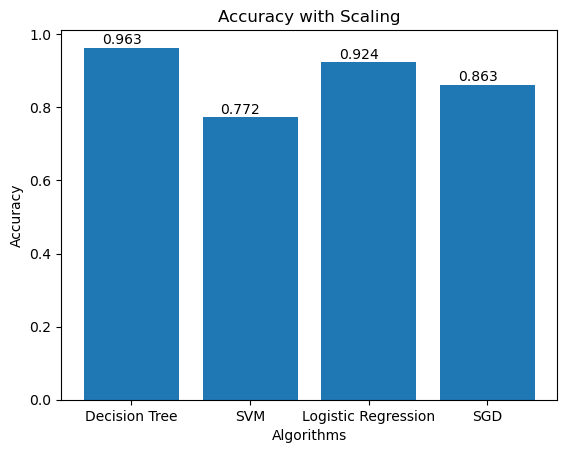

In [15]:
x_axis = ['Decision Tree', 'SVM', 'Logistic Regression', 'SGD']
y_axis = [DT_accuracy, SVM_accuracy, LG_accuracy, SGD_accuracy]

plt.bar(x_axis, y_axis)
plt.title('Accuracy with Scaling')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
for i, v in enumerate(y_axis):
    plt.text(i-0.25, v+0.01, "{:.3f}".format(v))
plt.show()

In [16]:
def kFoldAverages(num,scalar):
    SGD_accuracy =[]
    SVM_accuracy =[]
    LG_accuracy =[]
    DT_accuracy =[]
    RF_accuracy =[]
    BG_accuracy =[]
    kf = KFold(n_splits=num,shuffle=True)
    for i, (train_index, test_index) in enumerate(kf.split(df_train)):
        print(f"Fold {i}:")
#         print(f"  Train: index={train_index}") 
#         print(f"  Test:  index={test_index}")
        X_train=df_train.iloc[train_index,:-1]
        X_test=df_train.iloc[test_index,:-1]
        y_train=df_train.iloc[train_index,-1]
        y_test=df_train.iloc[test_index,-1]
        
        pipe = make_pipeline(scalar(), SGDClassifier())
        pipe.fit(X_train, y_train)
        SGD_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(scalar(), SVC(kernel='linear'))
        pipe.fit(X_train, y_train)
        SVM_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(StandardScaler(),LogisticRegression(C=100, max_iter=1000))
        pipe.fit(X_train, y_train)
        LG_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(StandardScaler(),DecisionTreeClassifier())
        pipe.fit(X_train, y_train)
        DT_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(StandardScaler(),RandomForestClassifier())
        pipe.fit(X_train, y_train)
        RF_accuracy.append(pipe.score(X_test, y_test)) 
        
        bag_clf = BaggingClassifier(
            DecisionTreeClassifier(), n_estimators=500,
            max_samples=1000, bootstrap=True, n_jobs=-1, max_features = 0.1
        )
        bag_clf.fit(X_train, y_train)
        BG_accuracy.append(bag_clf.score(X_test, y_test))
    
    print("SGD Test set accuracy", SGD_accuracy) 
    print("SVM Test set accuracy", SVM_accuracy) 
    print("LG Test set accuracy", LG_accuracy) 
    print("DT Test set accuracy", DT_accuracy) 
    print("BG Test set accuracy", BG_accuracy) 
    x_axis = ['Decision Tree','Random Forest','Bagging Classifier' , 'SVM', 'Logistic Regression', 'SGD']
    y_axis = [DT_accuracy,RF_accuracy , BG_accuracy ,SVM_accuracy, LG_accuracy, SGD_accuracy]
    y_axis=[sum(y) / len(y) for y in y_axis]
    plt.bar(x_axis, y_axis)
    plt.title('Alogorithm Results')
    plt.ylabel('Accuracy')
    for i, v in enumerate(y_axis):
        plt.text(i-0.25, v+0.01, "{:.3f}".format(v))
    plt.xticks(rotation=45)
    plt.show()

Fold 0:
Fold 1:
Fold 2:
Fold 3:
Fold 4:
SGD Test set accuracy [0.905, 0.8675, 0.88, 0.8975, 0.8933333333333333]
SVM Test set accuracy [0.9041666666666667, 0.8933333333333333, 0.9, 0.9016666666666666, 0.9]
LG Test set accuracy [0.9141666666666667, 0.9141666666666667, 0.9191666666666667, 0.9208333333333333, 0.9175]
DT Test set accuracy [0.9525, 0.9725, 0.9616666666666667, 0.9483333333333334, 0.955]
BG Test set accuracy [0.9566666666666667, 0.9541666666666667, 0.9591666666666666, 0.9533333333333334, 0.9666666666666667]


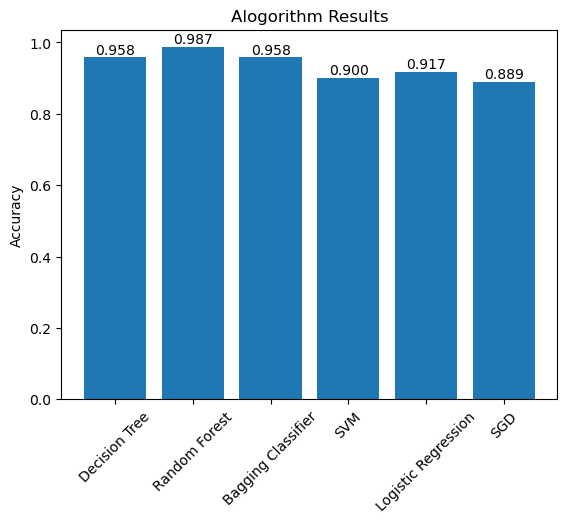

In [17]:
kFoldAverages(5,StandardScaler)

In [18]:
def kFoldStanderdisationAverages(num):
    control_Accurarcy =[]
    standard_Accuracy =[]
    minMax_Accuracy = []
    maxAbs_Accuracy = []
    kf = KFold(n_splits=num,shuffle=True)
    for i, (train_index, test_index) in enumerate(kf.split(df_train)):
        print(f"Fold {i}:")
        X_train=df_train.iloc[train_index,:-1]
        X_test=df_train.iloc[test_index,:-1]
        y_train=df_train.iloc[train_index,-1]
        y_test=df_train.iloc[test_index,-1]
        
        
        
        pipe = RandomForestClassifier()
        pipe.fit(X_train, y_train)
        control_Accurarcy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(StandardScaler(),RandomForestClassifier())
        pipe.fit(X_train, y_train)
        standard_Accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(MinMaxScaler(),RandomForestClassifier())
        pipe.fit(X_train, y_train)
        minMax_Accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = make_pipeline(MaxAbsScaler(),RandomForestClassifier())
        pipe.fit(X_train, y_train)
        maxAbs_Accuracy.append(pipe.score(X_test, y_test)) 
        
        
        
        
        

    x_axis = ['No Preprocessing','Sklearn StandardScaler','Sklearn MinMax Scaler' ,'Sklearn MaxAbs Scaler']
    y_axis = [control_Accurarcy,standard_Accuracy , minMax_Accuracy , maxAbs_Accuracy]
    y_axis=[sum(y) / len(y) for y in y_axis]
    plt.bar(x_axis, y_axis)
    plt.title('Alogorithm Results')
    plt.ylabel('Accuracy')
    for i, v in enumerate(y_axis):
        plt.text(i-0.25, v+0.01, "{:.3f}".format(v))
    plt.xticks(rotation=45)
    plt.show()

Fold 0:
Fold 1:
Fold 2:
Fold 3:
Fold 4:


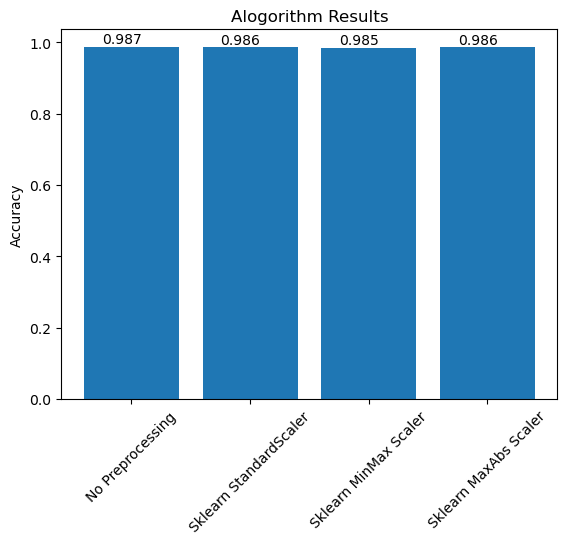

In [19]:
kFoldStanderdisationAverages(5)

In [45]:
def kFoldAverages2(num):
    SGD_accuracy =[]
    SVM_accuracy =[]
    LG_accuracy =[]
    DT_accuracy =[]
    RF_accuracy =[]
    BG_accuracy =[]
    kf = KFold(n_splits=num,shuffle=True)
    for i, (train_index, test_index) in enumerate(kf.split(df_train)):
        print(f"Fold {i}:")
#         print(f"  Train: index={train_index}") 
#         print(f"  Test:  index={test_index}")
        X_train=df_train.iloc[train_index,:-1]
        X_test=df_train.iloc[test_index,:-1]
        y_train=df_train.iloc[train_index,-1]
        y_test=df_train.iloc[test_index,-1]
        
        pipe =  SGDClassifier()
        pipe.fit(X_train, y_train)
        SGD_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe =  SVC(kernel='linear')
        pipe.fit(X_train, y_train)
        SVM_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = LogisticRegression(C=100, max_iter=1000)
        pipe.fit(X_train, y_train)
        LG_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = DecisionTreeClassifier()
        pipe.fit(X_train, y_train)
        DT_accuracy.append(pipe.score(X_test, y_test)) 
        
        pipe = RandomForestClassifier()
        pipe.fit(X_train, y_train)
        RF_accuracy.append(pipe.score(X_test, y_test)) 
        
        bag_clf = BaggingClassifier(
            DecisionTreeClassifier(), n_estimators=500,
            max_samples=1000, bootstrap=True, n_jobs=-1, max_features = 0.1
        )
        bag_clf.fit(X_train, y_train)
        BG_accuracy.append(bag_clf.score(X_test, y_test))
    
    print("SGD Test set accuracy", SGD_accuracy) 
    print("SVM Test set accuracy", SVM_accuracy) 
    print("LG Test set accuracy", LG_accuracy) 
    print("DT Test set accuracy", DT_accuracy) 
    print("BG Test set accuracy", BG_accuracy) 
    x_axis = ['Decision Tree','Random Forest','Bagging Classifier' , 'SVM', 'Logistic Regression', 'SGD']
    y_axis = [DT_accuracy,RF_accuracy , BG_accuracy ,SVM_accuracy, LG_accuracy, SGD_accuracy]
    y_axis=[sum(y) / len(y) for y in y_axis]
    plt.bar(x_axis, y_axis)
    plt.title('Alogorithm Results Without Preprocessing')
    plt.ylabel('Accuracy')
    for i, v in enumerate(y_axis):
        plt.text(i-0.25, v+0.01, "{:.3f}".format(v))
    plt.xticks(rotation=45)
    plt.show()

Fold 0:
Fold 1:
Fold 2:
Fold 3:
Fold 4:
SGD Test set accuracy [0.7708333333333334, 0.515, 0.745, 0.7808333333333334, 0.7758333333333334]
SVM Test set accuracy [0.8566666666666667, 0.86, 0.85, 0.8791666666666667, 0.8691666666666666]
LG Test set accuracy [0.8566666666666667, 0.8666666666666667, 0.855, 0.8825, 0.8791666666666667]
DT Test set accuracy [0.9491666666666667, 0.9566666666666667, 0.9558333333333333, 0.9591666666666666, 0.96]
BG Test set accuracy [0.9575, 0.96, 0.9608333333333333, 0.9641666666666666, 0.9625]


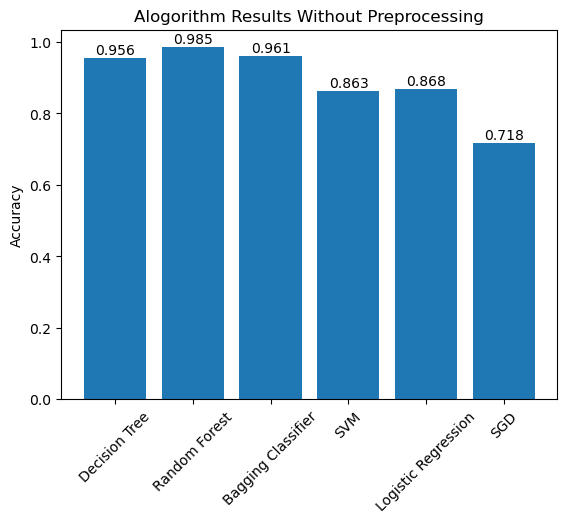

In [46]:
kFoldAverages2(5)

In [55]:
def kFoldForest(num):
    
    RF_accuracy =[]
    kf = KFold(n_splits=num,shuffle=True)
    for i, (train_index, test_index) in enumerate(kf.split(df_train)):
        print(f"Fold {i}:")
#         print(f"  Train: index={train_index}") 
#         print(f"  Test:  index={test_index}")
        X_train=df_train.iloc[train_index,:-1]
        X_test=df_train.iloc[test_index,:-1]
        y_train=df_train.iloc[train_index,-1]
        y_test=df_train.iloc[test_index,-1]
        
        
        pipe = make_pipeline(StandardScaler(),PCA(),SVC(kernel='linear') ) 
        pipe.fit(X_train, y_train)
        RF_accuracy.append(pipe.score(X_test, y_test)) 
        
    
    
    x_axis = ["Fold "+ str(i+1) for i in range(len(RF_accuracy))]
    y_axis = RF_accuracy
    plt.bar(x_axis, y_axis)
    plt.title('Random Forest Results with K-fold')
    plt.ylabel('Accuracy')
    for i, v in enumerate(y_axis):
        plt.text(i-0.25, v+0.01, "{:.3f}".format(v))
    plt.xticks(rotation=45)
    plt.show()

Fold 0:
Fold 1:
Fold 2:
Fold 3:
Fold 4:


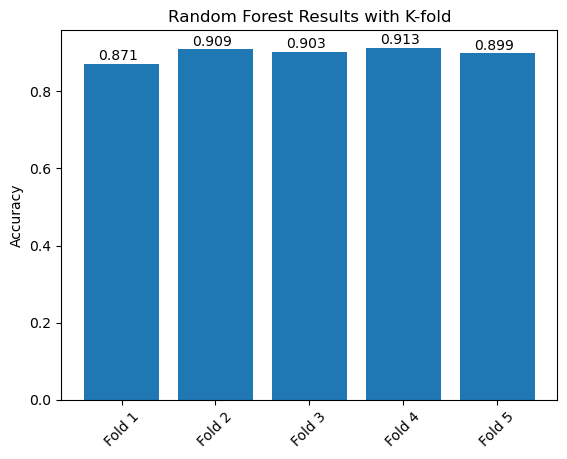

In [56]:
kFoldForest(5)

# Predictions

In [12]:
X_train=df_train.iloc[:,:-1]
y_train=df_train.iloc[:,-1]


In [13]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,118,119,120,121,122,123,124,125,126,127
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,0,0,0,0,0,0,0,0,0,0
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,0,0,0,0,0,0,0,0,0,0
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,0,0,0,0,0,0,0,0,0,0
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,0,0,0,0,0,0,0,0,0,0
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,116.889120,131860.3269,-3.076783,131810.1804,-123.094253,131910.4735,114.780635,376.10794,-5.254023,374.82617,...,0,0,0,0,0,0,0,0,0,0
5996,116.849013,131810.1804,-3.116890,131760.0339,-123.128630,131885.4002,114.769176,376.29105,-5.322778,374.82617,...,0,0,0,0,0,0,0,0,0,0
5997,116.384917,131734.9606,-3.586716,131684.8140,-123.586996,131785.1071,114.299351,376.47416,-5.849899,374.82617,...,0,0,0,0,0,0,0,0,0,0
5998,111.125164,130506.3704,-8.846468,130456.2238,-128.858208,130556.5169,106.667553,478.83265,-13.464508,477.73399,...,0,0,0,0,0,0,0,0,0,0


In [14]:
y_train

0       0
1       0
2       0
3       0
4       0
       ..
5995    0
5996    0
5997    0
5998    0
5999    0
Name: 128, Length: 6000, dtype: int64

In [15]:
X_test=pd.DataFrame(data = testData)

In [16]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
print(rfc.score(X_train,y_train))

1.0


In [17]:
preds = rfc.predict(X_test)

In [18]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [21]:
pd.DataFrame(preds).to_csv('TestingResultsBinary.csv', index=False, header=False)

In [19]:
pps = rfc.predict_proba(X_test)

In [32]:
preds

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0])

In [33]:
con = []
for y in pps:
    if y[0] > 0.5:
        con.append(y[0])
    else:
        con.append(y[1])
avgCon = sum(con) / len(con)
print(con,sep=' ')
print("average confindence",avgCon)

[0.95, 0.93, 0.93, 0.93, 0.92, 0.93, 0.93, 0.93, 0.93, 0.93, 0.92, 0.92, 0.92, 1.0, 0.97, 0.96, 0.95, 0.95, 0.94, 0.95, 0.95, 0.63, 0.68, 0.5, 0.98, 0.9, 0.92, 0.97, 0.98, 0.93, 0.91, 0.82, 0.81, 0.85, 0.85, 0.84, 0.8, 0.72, 0.71, 0.57, 0.77, 0.83, 0.87, 0.91, 0.85, 0.67, 0.89, 0.86, 0.69, 0.72, 0.98, 0.95, 0.98, 0.99, 0.98, 0.98, 0.99, 0.98, 0.95, 0.86, 0.85, 0.86, 0.74, 0.74, 0.77, 0.76, 0.93, 0.9, 0.58, 0.62, 0.85, 0.83, 0.88, 0.93, 0.92, 0.66, 0.66, 0.67, 0.76, 0.82, 0.71, 0.77, 0.8, 0.79, 0.79, 0.91, 0.88, 0.92, 0.88, 0.93, 0.92, 0.9, 0.89, 0.8, 0.78, 0.53, 0.78, 0.78, 0.66, 0.64]
average confindence 0.846


In [34]:
X_train, X_test, y_train, y_test = train_test_split(df_train.iloc[:,:-1],df_train.iloc[:,-1], test_size=0.2, random_state=None)
pipe = make_pipeline(StandardScaler(),RandomForestClassifier())
pipe.fit(X_train, y_train)


# Finally, we can evaluate the model's performance on the test set
DT_accuracy = pipe.score(X_test, y_test)
print("Test set accuracy: {:.2f}".format(DT_accuracy)) 
pps =pipe.predict_proba(X_test)

con = []
for y in pps:
    if y[0] > 0.5:
        con.append(y[0])
    else:
        con.append(y[1])
        
avgCon = sum(con) / len(con)
print(con,sep=' ')
print("average confindence",avgCon)


Test set accuracy: 0.98
[1.0, 1.0, 0.87, 0.99, 0.99, 0.98, 0.81, 1.0, 0.87, 0.99, 1.0, 0.98, 0.91, 0.86, 0.9, 0.97, 1.0, 1.0, 0.69, 0.98, 1.0, 0.99, 0.92, 0.98, 1.0, 0.97, 0.99, 0.91, 0.83, 0.99, 0.99, 0.98, 1.0, 1.0, 0.99, 0.99, 1.0, 1.0, 0.93, 0.93, 1.0, 0.91, 0.52, 0.93, 0.95, 1.0, 0.92, 0.99, 0.95, 0.98, 1.0, 1.0, 0.89, 0.64, 0.96, 0.87, 1.0, 1.0, 0.95, 0.99, 0.93, 0.98, 0.78, 0.78, 1.0, 1.0, 0.66, 0.98, 0.99, 1.0, 1.0, 0.98, 0.93, 1.0, 0.87, 0.98, 1.0, 0.99, 0.82, 0.89, 0.96, 1.0, 0.84, 1.0, 1.0, 0.99, 0.97, 0.82, 0.93, 0.82, 1.0, 0.91, 0.55, 0.97, 0.99, 0.99, 1.0, 1.0, 1.0, 1.0, 0.71, 1.0, 1.0, 0.93, 0.98, 1.0, 0.96, 1.0, 0.97, 0.99, 0.99, 0.89, 0.51, 0.97, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.96, 0.99, 0.65, 0.91, 0.95, 0.85, 0.86, 1.0, 1.0, 0.9, 1.0, 0.95, 1.0, 0.99, 1.0, 1.0, 1.0, 0.97, 0.95, 0.51, 1.0, 0.99, 1.0, 1.0, 1.0, 0.91, 1.0, 1.0, 0.95, 0.97, 0.55, 0.98, 0.95, 0.96, 1.0, 0.99, 0.92, 0.8, 0.95, 1.0, 1.0, 0.98, 1.0, 1.0, 0.95, 1.0, 1.0, 1.0, 0.97, 1.0, 1.0, 0.98, 1.0, 0

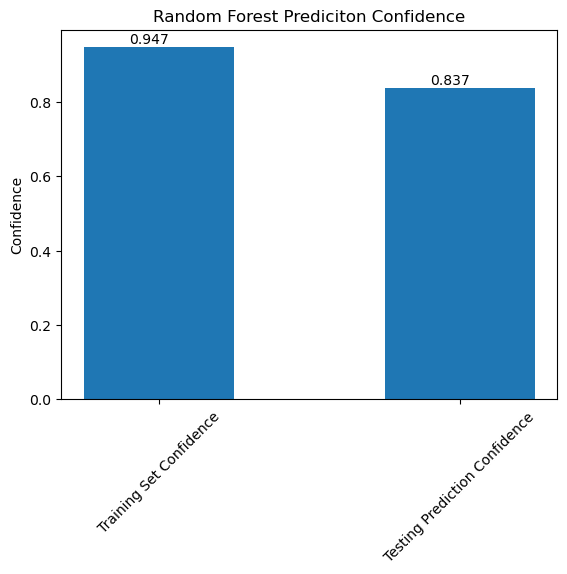

In [35]:
x_axis = ["Training Set Confidence", "Testing Prediction Confidence"]
y_axis = [0.947,0.837]
plt.bar(x_axis, y_axis, width = 0.5)
plt.title('Random Forest Prediciton Confidence')
plt.ylabel('Confidence')
for i, v in enumerate(y_axis):
    plt.text(i-0.1, v+0.01, "{:.3}".format(v))
plt.xticks(rotation=45)
plt.show()

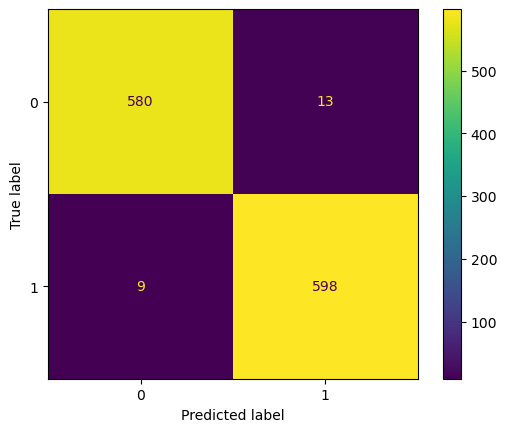

In [36]:

preds = pipe.predict(X_test)

confusion_matrix = metrics.confusion_matrix(y_test, preds)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)

cm_display.plot()
plt.show()
